In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 14s 1us/step


In [11]:
print(X_train.shape)
print(y_train)

(60000, 28, 28)
[5 0 4 ... 5 6 8]


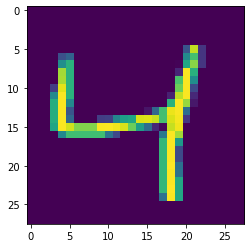

In [14]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
model =Sequential(
[
    Flatten(input_shape = (28,28)),   # convert 2D array into 1D
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.1165 - val_accuracy: 0.9737
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.1257 - val_accuracy: 0.9732
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 0.9983 - val_loss: 0.1119 - val_accuracy: 0.9749
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 0.1216 - val_accuracy: 0.9762
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0057 - accuracy: 0.9980 - val_loss: 0.1127 - val_accuracy: 0.9772
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.1234 - val_accuracy: 0.9756
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.1275 - val_accuracy:

In [34]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [35]:
y_pred = y_prob.argmax(axis = 1)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.978

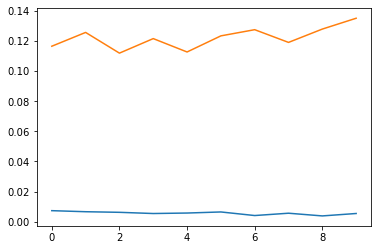

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

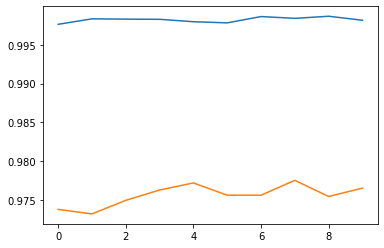

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

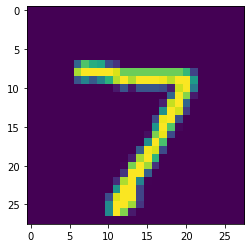

In [41]:
plt.imshow(X_test[0])

In [46]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis = 1)

1/1 [==============================] - 0s 15ms/step


array([7], dtype=int64)